<a href="https://colab.research.google.com/github/kolbrak/Iowa-Population/blob/master/Iowa_Population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What was I trying to do?



In [ ]:
# Import all the things we need ---

import os,random
import pandas as pd
pd.plotting.register_matplotlib_converters()
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
!pip install geopandas
import geopandas
from shapely.geometry import Point
import missingno as msn


     |████████████████████████████████| 921kB 4.6MB/s 
     |████████████████████████████████| 11.8MB 52.8MB/s 
     |████████████████████████████████| 10.1MB 41.2MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')
#force_remount=True

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [ ]:
#This line checks that the drive was mounted
!ls "/content/gdrive/My Drive/Colab Notebooks/"

 activities.csv			       minisom.py
 activities.gsheet		       model.h5
 Baseball.ipynb			       model.json
'Create Lat_Lon for locations.ipynb'   model.png
 daily-total-female-births.txt	       Modulation_Classification.ipynb
'gz_2010_us_040_00_500k (1).json'      plpopulation18502000.csv
 iowa_locations.csv		       RML2016.10a_dict.pkl
 Iowa_Population.ipynb		      'Strava Ride Data Clustering.ipynb'
 kmeans.py			       Time_series_prediction.ipynb


In [ ]:
#Import the dataset
population = pd.read_csv('gdrive/My Drive/Colab Notebooks/plpopulation18502000.csv', index_col = 'Area')

In [ ]:
#Data Preprocessing - Replace all '---' with 0
population.replace('---', 0, inplace = True)
population = population.astype(float)
population.head(3)
population = population.transpose()
population.head()

Area,Ackley,Ackworth,Adair,Adel,Afton,Agency,Ainsworth,Akron,Albert City,Albia,Albion,Alburnett,Alden,Alexander,Algona,Alleman,Allerton,Allison,Alta,Alta Vista,Alton,Altoona,Alvord,Ames,Anamosa,Andover,Andrew,Anita,Ankeny,Anthon,Aplington,Arcadia,Archer,Aredale,Arion,Arispe,Arlington,Armstrong,Arnolds Park,Arthur,...,West Branch,West Burlington,West Chester,West Des Moines,West Liberty,West Okoboji,West Point,West Union,Westfield,Westgate,Westphalia,Westside,Westwood,What Cheer,Wheatland,Whiting,Whittemore,Whitten,Willey,Williams,Williamsburg,Williamson,Wilton,Windsor Heights,Winfield,Winterset,Winthrop,Wiota,Woden,Woodbine,Woodburn,Woodward,Woolstock,Worthington,Wyoming,Yale,Yetter,Yorktown,Zearing,Zwingle
2000,1809.0,85.0,839.0,3435.0,917.0,622.0,524.0,1489.0,709.0,3706.0,592.0,559.0,904.0,165.0,5741.0,439.0,559.0,1006.0,1865.0,286.0,1095.0,10345.0,187.0,50731.0,5494.0,87.0,460.0,1049.0,27117.0,649.0,1054.0,443.0,126.0,89.0,136.0,89.0,490.0,979.0,1162.0,245.0,...,2188.0,3161.0,159.0,46403.0,3332.0,432.0,980.0,2549.0,189.0,234.0,160.0,327.0,127.0,678.0,772.0,707.0,530.0,160.0,103.0,427.0,2622.0,163.0,2829.0,4805.0,1131.0,4768.0,772.0,149.0,243.0,1564.0,244.0,1200.0,204.0,381.0,626.0,287.0,36.0,82.0,617.0,100.0
1990,1696.0,66.0,894.0,3304.0,953.0,616.0,506.0,1450.0,779.0,3870.0,585.0,459.0,855.0,170.0,6015.0,340.0,599.0,1000.0,1820.0,246.0,1063.0,7242.0,204.0,47198.0,5100.0,99.0,319.0,1068.0,18482.0,638.0,1034.0,485.0,145.0,88.0,148.0,92.0,465.0,1025.0,953.0,272.0,...,1908.0,3083.0,178.0,31702.0,2935.0,263.0,1079.0,2490.0,160.0,207.0,144.0,348.0,104.0,762.0,723.0,683.0,535.0,137.0,78.0,368.0,2174.0,166.0,2577.0,5190.0,1051.0,4196.0,742.0,160.0,259.0,1500.0,240.0,1197.0,212.0,439.0,659.0,220.0,49.0,100.0,614.0,94.0
1980,1900.0,83.0,894.0,2846.0,985.0,657.0,547.0,1517.0,818.0,4184.0,739.0,411.0,953.0,190.0,6289.0,307.0,670.0,1132.0,1720.0,314.0,986.0,5764.0,246.0,45775.0,4958.0,107.0,349.0,1153.0,15429.0,687.0,1027.0,454.0,134.0,88.0,207.0,89.0,498.0,1153.0,1051.0,288.0,...,1867.0,3371.0,191.0,21894.0,2723.0,435.0,1133.0,2783.0,199.0,263.0,169.0,387.0,0.0,803.0,840.0,734.0,647.0,168.0,94.0,410.0,2033.0,210.0,2502.0,5474.0,1042.0,4021.0,767.0,181.0,287.0,1463.0,207.0,1212.0,235.0,432.0,702.0,299.0,52.0,123.0,630.0,119.0
1970,1794.0,111.0,883.0,2419.0,823.0,610.0,455.0,1324.0,683.0,4151.0,772.0,418.0,876.0,249.0,6032.0,0.0,643.0,1071.0,1717.0,283.0,1018.0,2883.0,204.0,39505.0,4389.0,90.0,335.0,1101.0,9151.0,711.0,936.0,414.0,134.0,126.0,199.0,93.0,481.0,1061.0,970.0,273.0,...,1322.0,3139.0,199.0,16441.0,2296.0,210.0,1045.0,2624.0,148.0,204.0,121.0,389.0,0.0,868.0,832.0,590.0,658.0,194.0,72.0,456.0,1544.0,216.0,1873.0,6303.0,897.0,3654.0,750.0,171.0,265.0,1349.0,186.0,1010.0,222.0,365.0,746.0,301.0,52.0,105.0,535.0,96.0
1960,1731.0,77.0,750.0,2060.0,773.0,702.0,371.0,1351.0,722.0,4582.0,588.0,341.0,838.0,294.0,5702.0,0.0,692.0,952.0,1393.0,276.0,1048.0,1458.0,238.0,27003.0,4616.0,91.0,349.0,1233.0,2964.0,681.0,840.0,437.0,209.0,153.0,201.0,125.0,614.0,958.0,953.0,265.0,...,1053.0,2560.0,253.0,11949.0,2042.0,171.0,758.0,2551.0,187.0,214.0,131.0,367.0,0.0,956.0,643.0,595.0,741.0,184.0,80.0,490.0,1342.0,262.0,1750.0,4715.0,862.0,3639.0,649.0,195.0,283.0,1304.0,202.0,967.0,269.0,360.0,797.0,260.0,85.0,150.0,528.0,110.0


Plot a sample population vs time of a city

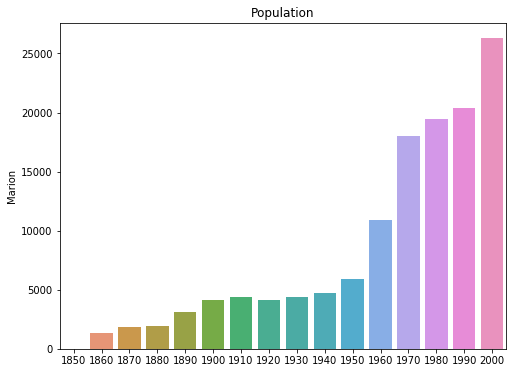

In [ ]:

# Set the width and height of the figure
plt.figure(figsize=(8,6))

#Add Title
plt.title('Population')
sns.barplot(x = population.index, y = population['Marion'], data = population)

In [ ]:
#Import the dataset
IA_locations = pd.read_csv('gdrive/My Drive/Colab Notebooks/iowa_locations.csv', index_col = 'Area')

In [ ]:
#this merges the latitude/longitude dataframe and the population dataframe
IA_locations = IA_locations.join(population.transpose(), how='left')

In [ ]:
# Get names of indexes for which column Lat has value less than 38.  Some latitude / longitude pairs came out wrong so for this example we discard them
indexNames = IA_locations[ IA_locations['lat'] <= 38 ].index
# Delete these row indexes from dataFrame
IA_locations.drop(indexNames , inplace=True)

In [ ]:
#Load the shape files for geopandas to create the state outline
country = geopandas.read_file('gdrive/My Drive/Colab Notebooks/gz_2010_us_040_00_500k (1).json')

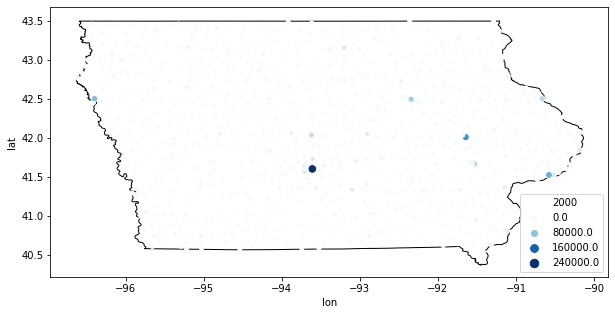

In [ ]:
country[country['NAME'].isin(['Iowa']) == True].plot(figsize=(10,7), color="white", edgecolor='black')
ax = sns.scatterplot(x="lon", y="lat", data=IA_locations, size = '2000', hue='2000', palette='Blues')